# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">01 - Preprocessing - Merging & Cleaning 2018 Data</span>      
----

### Imports

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

Source data can be found at http://www.ercot.com/gridinfo/generation

In [12]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2018.xlsx', sheet_name = None)

In [13]:
df.keys()

dict_keys(['data_Summary_1', 'data_Summary_2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## 2. Clean the data

#### Remove non-month keys from the dictionary

In [14]:
del df['data_Summary_1']
del df['data_Summary_2']

#### Combine all the sheets into one dataframe

In [16]:
cdf = pd.concat(df,sort=False)

In [17]:
cdf.head()

Date     Fuel Settlement Type          Total         0:15  \
Jan 0 2018-01-01  Biomass           FINAL    1195.754309    13.457549   
    1 2018-01-01     Coal           FINAL  389258.315028  3942.410077   
    2 2018-01-01      Gas           FINAL  113836.185351   688.936298   
    3 2018-01-01   Gas-CC           FINAL  587189.859304  5596.204500   
    4 2018-01-01    Hydro           FINAL    1585.777408    15.162467   

              0:30         0:45         1:00         1:15         1:30  ...  \
Jan 0    13.228781    13.131884    13.128581    13.092830    13.109656  ...   
    1  3949.370313  3953.556692  3961.288421  3970.608378  3975.799113  ...   
    2   685.619494   690.002912   707.757948   735.682406   744.418179  ...   
    3  5599.707056  5579.441966  5574.560739  5592.268245  5613.199356  ...   
    4    15.107859    15.095289    15.133884    15.224408    15.189056  ...   

             22:45        23:00        23:15        23:30        23:45  \
Jan 0    12.515136    12.534597    12.565429    12.518081    12.535381   
    1  4134.785187  4133.674870  4131.358854  4130.927111  4138.262751   
    2  1071.682903  1052.624877  1031.986995  1007.648133   967.338258   
    3  6270.702119  6158.539912  6033.313310  5968.233135  5897.493341   
    4    15.227474    15.258727    15.323697    15.229524    15.221295   

              0:00  01:15 (DST)  01:30 (DST)  01:45 (DST)  02:00 (DST)  
Jan 0    12.549833          NaN          NaN          NaN          NaN  
    1  4143.650633          NaN          NaN          NaN          NaN  
    2   941.885448          NaN          NaN          NaN          NaN  
    3  5819.728021          NaN          NaN          NaN          NaN  
    4    15.222616          NaN          NaN          NaN          NaN  

[5 rows x 104 columns]

#### Select only the date, fuel type, and total electricity generated by fuel type for that day as new dataframe

In [18]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [19]:
full_df.head()

Date     Fuel          Total
Jan 0 2018-01-01  Biomass    1195.754309
    1 2018-01-01     Coal  389258.315028
    2 2018-01-01      Gas  113836.185351
    3 2018-01-01   Gas-CC  587189.859304
    4 2018-01-01    Hydro    1585.777408

#### Transpose the data such that the energy sources are columns and every row is a unique day throughout the year

In [20]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

#### Because we lost the data columns while transposing, create a new daily date column and set it as the index

In [21]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2018-01-01', periods=len(full_df), freq='D')

In [22]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,1195.754309,389258.315028,113836.185351,587189.859304,1585.777408,122791.286984,27.082457,4114.266705,76398.377201,2018-01-01
1,1240.583100,391352.689184,155985.315826,624453.428320,1923.317461,122844.792126,38.482910,1950.586580,70018.745351,2018-01-02
2,1132.507360,395722.160019,86355.681410,534970.199051,1690.076079,122894.181145,14.824072,7423.375018,108049.977832,2018-01-03
3,1184.486913,391002.612415,45070.982008,439947.210845,1733.065890,122905.633279,47.397290,3170.790564,131441.022249,2018-01-04
4,1189.741411,369030.680562,25845.367733,395335.848876,1851.268089,122929.426503,30.779664,6789.956937,90511.099291,2018-01-05


#### Now, let's set our newly created 'date' column as our index

In [23]:
full_df = full_df.set_index('date')

In [24]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2018-01-01,1195.754309,389258.315028,113836.185351,587189.859304,1585.777408,122791.286984,27.082457,4114.266705,76398.377201
2018-01-02,1240.583100,391352.689184,155985.315826,624453.428320,1923.317461,122844.792126,38.482910,1950.586580,70018.745351
2018-01-03,1132.507360,395722.160019,86355.681410,534970.199051,1690.076079,122894.181145,14.824072,7423.375018,108049.977832
2018-01-04,1184.486913,391002.612415,45070.982008,439947.210845,1733.065890,122905.633279,47.397290,3170.790564,131441.022249
2018-01-05,1189.741411,369030.680562,25845.367733,395335.848876,1851.268089,122929.426503,30.779664,6789.956937,90511.099291


#### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [25]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

## 3. Visualize the Data

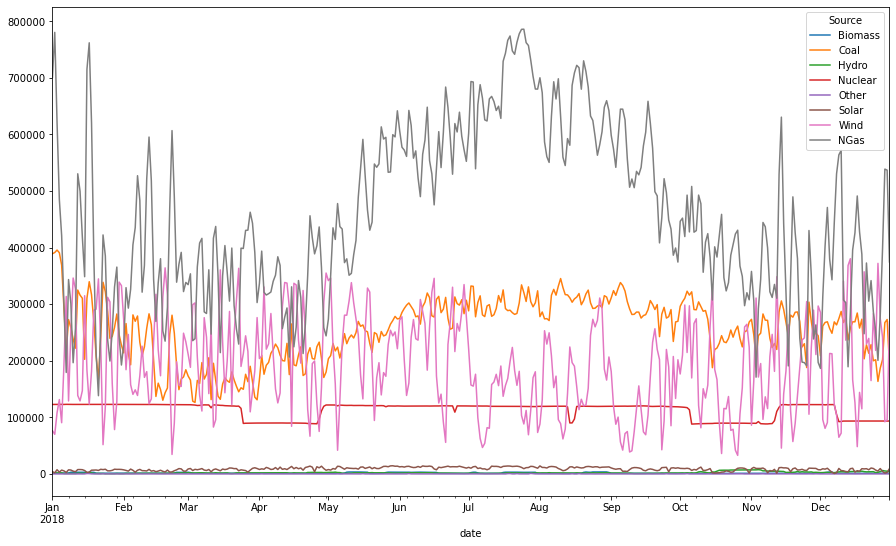

In [26]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


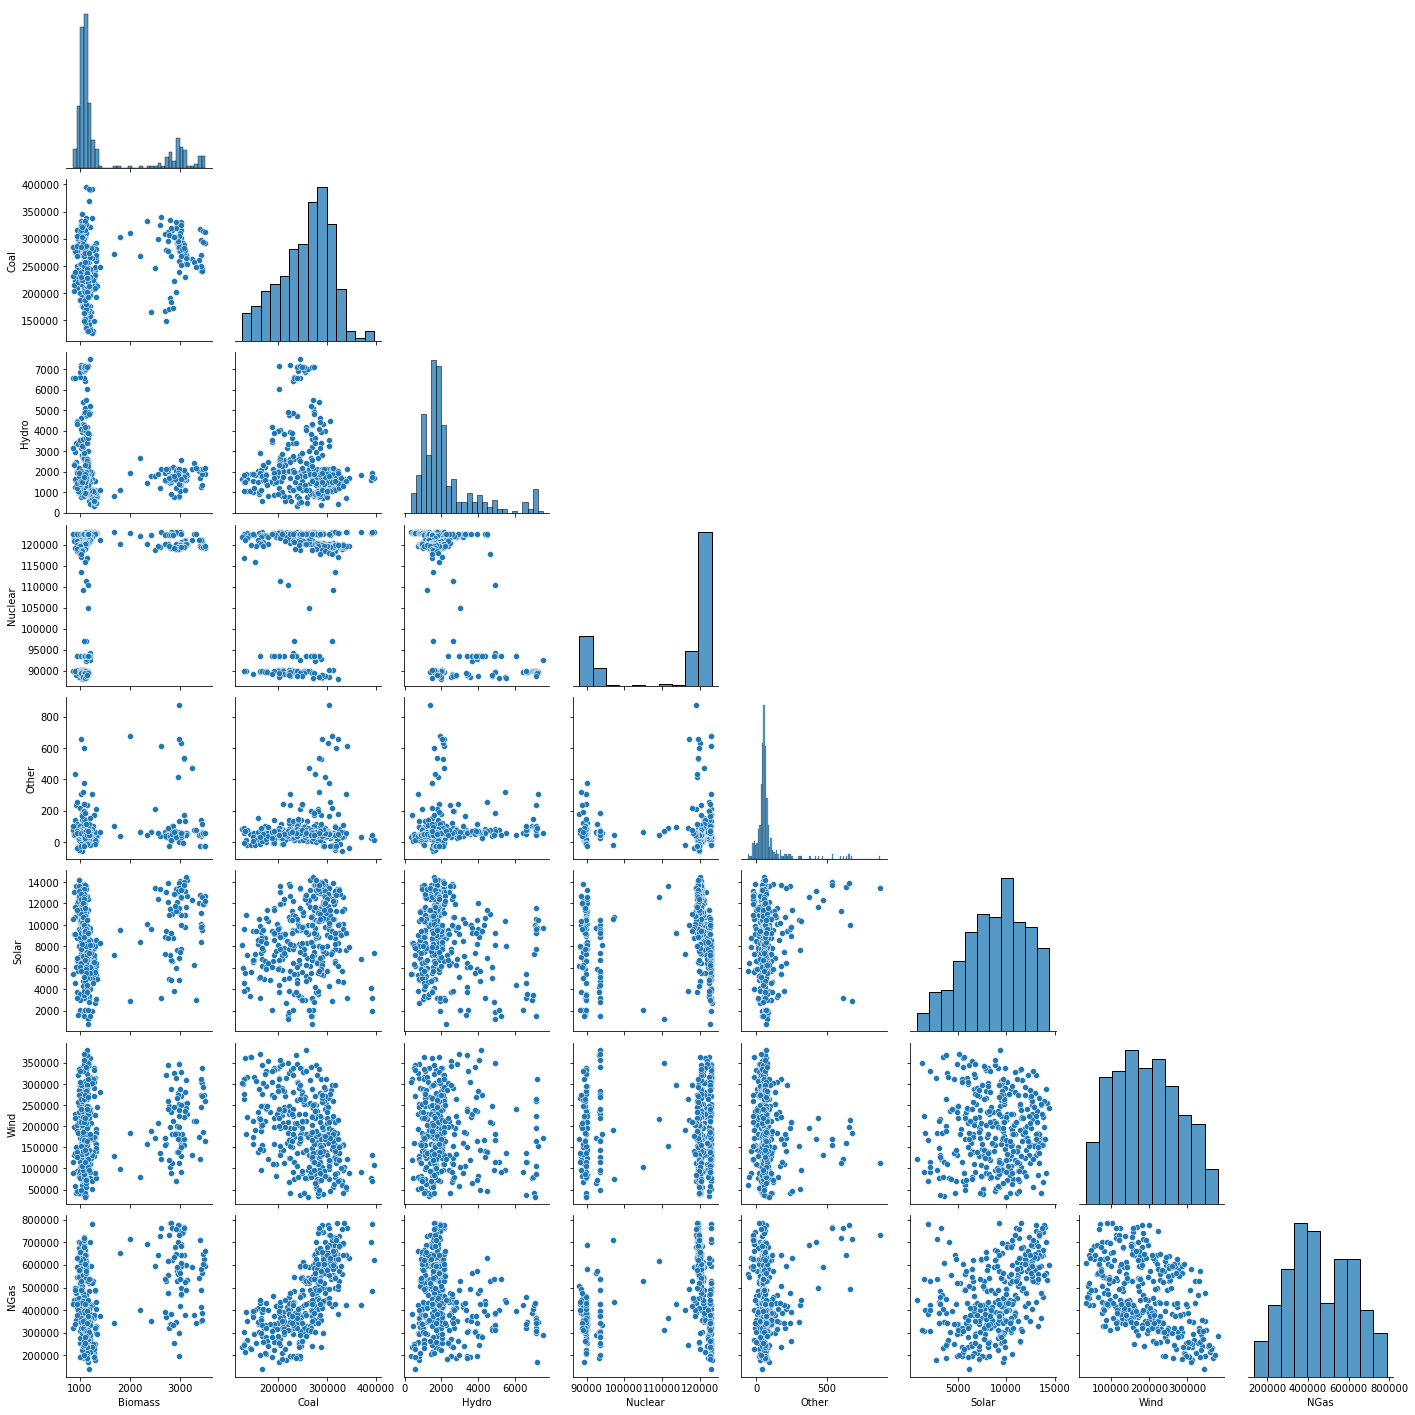

In [27]:
sns.pairplot(full_df, corner=True)

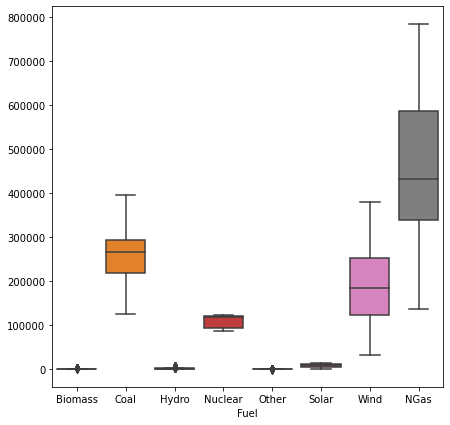

In [29]:
plt.figure(figsize=(7,7))
sns.boxplot(data = full_df,
            
            );


#### Relative to 2017, coal is being used in lower relative amounts as wind and natural gas continue to increase in usage.

### Export the cleaned data

In [30]:
full_df.to_csv('../../data/final_dfs/2018_clean.csv')